# Import and Initialize

In [3]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from openpyxl import load_workbook

file_path = '/Users/haydnjones/Documents/GitHub/flight-crashes/Plane Crashes.csv'

df = pd.read_csv(file_path)
df = pd.DataFrame(df)

# Cleaning

In [6]:
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df.columns = pd.Series(df.columns).apply(lambda col: col.lower())
df.dropna(how='all', inplace= True)
df.fillna("unknown", inplace = True)
df.columns = df.columns.str.replace(' ', '_')

df['crew_on_board'] = df['crew_on_board'].replace('unknown', '0.0')
df['crew_on_board'] = pd.to_numeric(df['crew_on_board'], errors='coerce')

df['pax_on_board'] = df['pax_on_board'].replace('unknown', '0.0')
df['pax_on_board'] = pd.to_numeric(df['pax_on_board'], errors='coerce')

df['crew_fatalities'] = df['crew_fatalities'].replace('unknown', '0.0')
df['crew_fatalities'] = pd.to_numeric(df['crew_fatalities'], errors='coerce')

df['pax_fatalities'] = df['pax_fatalities'].replace('unknown', '0.0')
df['pax_fatalities'] = pd.to_numeric(df['pax_fatalities'], errors='coerce')

df['other_fatalities'] = df['other_fatalities'].replace('unknown', '0.0')
df['other_fatalities'] = pd.to_numeric(df['other_fatalities'], errors='coerce')

df['total_on_board'] = df['crew_on_board'] + df['pax_on_board']
df['total_fatalities'] = df['crew_fatalities'] + df['pax_fatalities'] + df['other_fatalities']

df_cleaned = df.drop(['crew_on_board', 'crew_fatalities', 'pax_on_board', 'pax_fatalities', 'other_fatalities', 'yom', 'msn', 'flight_no.'], axis=1)

order = [
    "date", "time", "aircraft", "operator", "flight_phase",
    "flight_type", "crash_site", "schedule", "crash_location",
    "country", "region", "circumstances", "crash_cause",
    "total_on_board", "total_fatalities", "survivors"
]

df_cleaned = df_cleaned[order]

In [8]:
passenger_types = [
    "scheduled revenue flight",
    "charter/taxi (non scheduled revenue flight)",
    "private",
    "executive/corporate/business",
    "ferry"
    "cargo",
    "positioning",
    "ambulance",
    "topographic",
    "geographical / geophysical / scientific",
    "illegal (smuggling)",
    "spraying (agricultural)",
    "humanitarian",
    "meteorological / weather",
    "fire fighting"
]

df_cleaned['flight_type'] = df_cleaned['flight_type'].apply(lambda x: 'passenger flights' if x in passenger_types else None)

df_cleaned = df_cleaned.dropna(subset=['flight_type']) 

In [10]:
threshold_year = 1950

df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])
df_cleaned = df_cleaned[df_cleaned['date'].dt.year >= threshold_year]

# Fatal Routes



## Wrangling

In [14]:
df_routes = df_cleaned.sort_values(by='schedule', ascending=False)

df_routes

,date,time,aircraft,operator,flight_phase,flight_type,crash_site,schedule,crash_location,country,region,circumstances,crash_cause,total_on_board,total_fatalities,survivors
13738,1965-08-25,21h 30m 0s,pzl-mielec an-2,aeroflot - russian international airlines,flight,passenger flights,"plain, valley",šilale - šilale,šilale apskritis of taurage,lithuania,europe,following crop-spraying operations in the regi...,human factor,1.0,1.0,no
26868,2011-03-02,9h 5m 0s,swearingen sa227 metro iii,air norway,landing (descent or approach),passenger flights,airport (less than 10 km from airport),ørland - oslo,oslo-gardermoen akershus,norway,europe,after touchdown on runway 19r at oslo-gardermo...,technical failure,11.0,0.0,yes
21521,1989-01-21,17h 47m 0s,swearingen sa226 metro ii,muk air,landing (descent or approach),passenger flights,airport (less than 10 km from airport),örnsköldsvik - örebro,örnsköldsvik ångermanland,sweden,europe,"after takeoff from örnsköldsvik airport, while...",technical failure,17.0,0.0,yes
16791,1974-09-15,11h 0m 0s,boeing 727-100,air vietnam,landing (descent or approach),passenger flights,airport (less than 10 km from airport),ðà n<u+1eb5>ng – saigon – singapore,phan rang ninh thu<u+1ead>n province,vietnam,asia,"en route from ðà n<u+1eb5>ng to saigon, while ...","terrorism act, hijacking, sabotage",75.0,75.0,no
14146,1967-01-12,unknown,pilatus pc-6 (porter & turbo porter),air america,flight,passenger flights,mountains,ðà n<u+1eb5>ng – qu<u+1ea3>ng ngãi,chu lai qu<u+1ea3>ng nam province,vietnam,asia,"while cruising in poor weather conditions, the...",weather,5.0,5.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20686,1986-05-21,15h 21m 0s,tupolev tu-154,aeroflot - russian international airlines,landing (descent or approach),passenger flights,airport (less than 10 km from airport),abakan - chelyabinsk - moscow,moscow-sheremetyevo moscow oblast,russia,asia,following an uneventful flight from chelyabins...,weather,185.0,0.0,yes
10382,1952-12-25,unknown,douglas c-47 skytrain (dc-3),iran air,landing (descent or approach),passenger flights,airport (less than 10 km from airport),abadan – téhéran,tehran tehran city district,iran,asia,while descending to tehran-mehrabad airport in...,technical failure,29.0,27.0,yes
11221,1955-09-14,unknown,avro 685 york,persian air services,flight,passenger flights,desert,abadan – kuwait city,al seeba al-basrah (<u+0627><u+0644><u+0628><u...,iraq,asia,about eight minutes after takeoff from abadan ...,human factor,13.0,0.0,yes
26669,2010-01-24,7h 20m 0s,tupolev tu-154,taban airlines,landing (descent or approach),passenger flights,airport (less than 10 km from airport),abadan - machhad,mashhad razavi khorasan,iran,asia,the three engine aircraft departed abadan for ...,human factor,170.0,0.0,yes


In [16]:
df_routes = df_cleaned.groupby("schedule")[["total_fatalities"]].sum().sort_values(by="total_fatalities", ascending=False).head(21)
df_routes = df_routes.iloc[1:]
df_routes

,total_fatalities
schedule,
tokyo - osaka,520.0
ankara - paris - london,346.0
los angeles – new york – las palmas,335.0
vancouver – toronto – montreal – london – new delhi – bombay,329.0
new delhi - dhahran - jeddah,312.0
karachi - riyadh - jeddah,301.0
amsterdam – kuala lumpur,298.0
bandar abbas – dubai,290.0
karachi - islamabad,279.0


## Charts

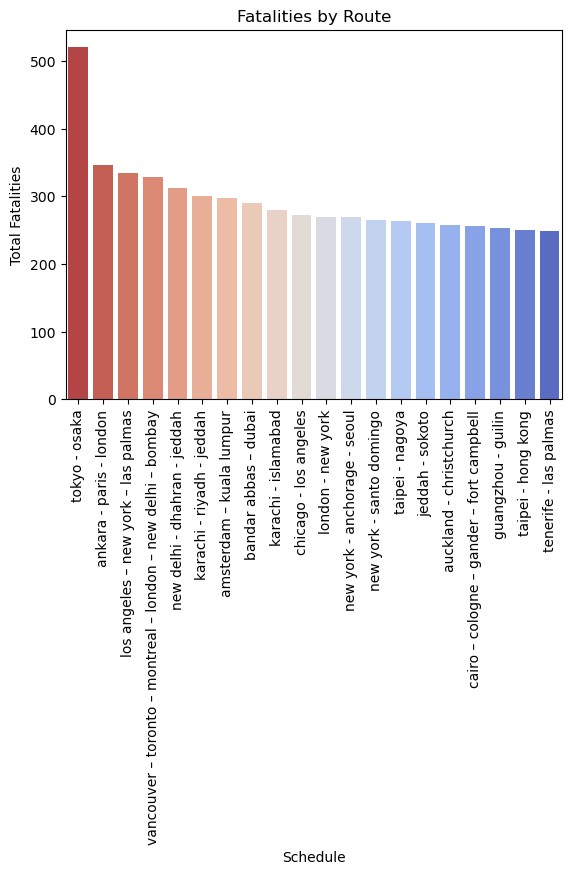

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x="schedule",y = "total_fatalities", data=df_routes, palette="coolwarm_r")
plt.title("Fatalities by Route")
plt.xticks(rotation=90)
plt.xlabel("Schedule")
plt.ylabel("Total Fatalities")
df_routes_reversed = df_routes.iloc[::-1]

In [21]:
df_routes["total_fatalities"].mean()

293.8

In [23]:
df_routes.mean()

total_fatalities    293.8
dtype: float64

In [25]:
df_routes.describe()

,total_fatalities
count,20.000000
mean,293.800000
std,60.841987
min,248.000000
25%,260.000000
50%,271.500000
75%,303.750000
max,520.000000


In [27]:
df_routes.sum()

total_fatalities    5876.0
dtype: float64

# Distance of Crash from Airport

## Wrangling 

In [31]:
df_cleaned.keys()

Index(['date', 'time', 'aircraft', 'operator', 'flight_phase', 'flight_type',
       'crash_site', 'schedule', 'crash_location', 'country', 'region',
       'circumstances', 'crash_cause', 'total_on_board', 'total_fatalities',
       'survivors'],
      dtype='object')

In [33]:
df_cleaned

,date,time,aircraft,operator,flight_phase,flight_type,crash_site,schedule,crash_location,country,region,circumstances,crash_cause,total_on_board,total_fatalities,survivors
9071,1950-01-03,unknown,avro 652 anson,united air services - tanzania,landing (descent or approach),passenger flights,"plain, valley",unknown,kazimzumbwi pwani region,tanzania,africa,"while approaching dar es-salaam, the twin engi...",unknown,2.0,2.0,no
9075,1950-01-07,unknown,boeing 247,lineas aéreas guerrero oaxaca - lagosa,takeoff (climb),passenger flights,"plain, valley",unknown,mexico city federal district of mexico city,mexico,central america,"few minutes after takeoff from mexico city, th...",unknown,0.0,0.0,unknown
9081,1950-01-14,unknown,de havilland dh.89 dragon rapide,new zealand national airways,parking,passenger flights,airport (less than 10 km from airport),rotorua – hamilton,rotorua bay of plenty regional council,new zealand,oceania,the aircraft was parked at rotorua airport and...,technical failure,5.0,0.0,yes
9082,1950-01-18,unknown,douglas dc-3,trans asiatic airlines - taa,takeoff (climb),passenger flights,airport (less than 10 km from airport),unknown,yangon yangon region,myanmar,asia,an undercarriage failed during takeoff roll. t...,technical failure,0.0,0.0,yes
9086,1950-01-22,unknown,de havilland dh.104 dove,central african airways - caa,landing (descent or approach),passenger flights,airport (less than 10 km from airport),unknown,livingstone southern,zambia,africa,crashed on final approach to livingstone airpo...,unknown,0.0,0.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28529,2022-05-11,unknown,de havilland dhc-6 twin otter,caverton helicopters,flight,passenger flights,"plain, valley",yaoundé – dompta – belabo,nanga eboko centre,cameroon,africa,the twin engine airplane departed yaoundé at 1...,unknown,11.0,11.0,no
28530,2022-05-12,8h 4m 0s,airbus a319,tibet airlines,takeoff (climb),passenger flights,airport (less than 10 km from airport),chongqing – nyingchi,chongqing-jiangbei sichuan,china,asia,the airplane was departing chongqing-jiangbei ...,unknown,122.0,0.0,yes
28532,2022-05-23,18h 29m 0s,piper pa-61 aerostar (ted smith 601),raul ignacion posada,flight,passenger flights,"plain, valley",celaya - durango,durango durango,mexico,central america,while approaching durango airport on a flight ...,unknown,2.0,2.0,no
28533,2022-05-24,15h 40m 0s,de havilland dhc-3 otter,yakutat coastal airlines,landing (descent or approach),passenger flights,airport (less than 10 km from airport),yakutat – dry bay,dry bay alaska,united states of america,north america,the single engine airplane departed yakutat on...,unknown,4.0,0.0,yes


In [35]:
df_cleaned["crash_site"].unique()

array(['plain, valley', 'airport (less than 10 km from airport)',
       'mountains', 'lake, sea, ocean, river', 'desert', 'unknown',
       'city'], dtype=object)

In [37]:
df_cleaned.sort_values(by="crash_site", ascending=False)
df_cleaned

,date,time,aircraft,operator,flight_phase,flight_type,crash_site,schedule,crash_location,country,region,circumstances,crash_cause,total_on_board,total_fatalities,survivors
9071,1950-01-03,unknown,avro 652 anson,united air services - tanzania,landing (descent or approach),passenger flights,"plain, valley",unknown,kazimzumbwi pwani region,tanzania,africa,"while approaching dar es-salaam, the twin engi...",unknown,2.0,2.0,no
9075,1950-01-07,unknown,boeing 247,lineas aéreas guerrero oaxaca - lagosa,takeoff (climb),passenger flights,"plain, valley",unknown,mexico city federal district of mexico city,mexico,central america,"few minutes after takeoff from mexico city, th...",unknown,0.0,0.0,unknown
9081,1950-01-14,unknown,de havilland dh.89 dragon rapide,new zealand national airways,parking,passenger flights,airport (less than 10 km from airport),rotorua – hamilton,rotorua bay of plenty regional council,new zealand,oceania,the aircraft was parked at rotorua airport and...,technical failure,5.0,0.0,yes
9082,1950-01-18,unknown,douglas dc-3,trans asiatic airlines - taa,takeoff (climb),passenger flights,airport (less than 10 km from airport),unknown,yangon yangon region,myanmar,asia,an undercarriage failed during takeoff roll. t...,technical failure,0.0,0.0,yes
9086,1950-01-22,unknown,de havilland dh.104 dove,central african airways - caa,landing (descent or approach),passenger flights,airport (less than 10 km from airport),unknown,livingstone southern,zambia,africa,crashed on final approach to livingstone airpo...,unknown,0.0,0.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28529,2022-05-11,unknown,de havilland dhc-6 twin otter,caverton helicopters,flight,passenger flights,"plain, valley",yaoundé – dompta – belabo,nanga eboko centre,cameroon,africa,the twin engine airplane departed yaoundé at 1...,unknown,11.0,11.0,no
28530,2022-05-12,8h 4m 0s,airbus a319,tibet airlines,takeoff (climb),passenger flights,airport (less than 10 km from airport),chongqing – nyingchi,chongqing-jiangbei sichuan,china,asia,the airplane was departing chongqing-jiangbei ...,unknown,122.0,0.0,yes
28532,2022-05-23,18h 29m 0s,piper pa-61 aerostar (ted smith 601),raul ignacion posada,flight,passenger flights,"plain, valley",celaya - durango,durango durango,mexico,central america,while approaching durango airport on a flight ...,unknown,2.0,2.0,no
28533,2022-05-24,15h 40m 0s,de havilland dhc-3 otter,yakutat coastal airlines,landing (descent or approach),passenger flights,airport (less than 10 km from airport),yakutat – dry bay,dry bay alaska,united states of america,north america,the single engine airplane departed yakutat on...,unknown,4.0,0.0,yes


## Charts

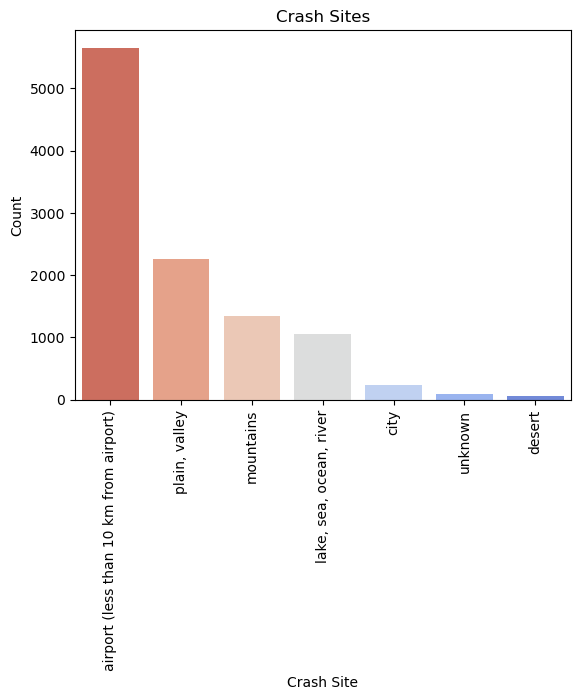

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences and sort in descending order
sorted_data = df_cleaned["crash_site"].value_counts()

# Convert the Series to a DataFrame
sorted_df = sorted_data.reset_index()
sorted_df.columns = ["crash_site", "count"]  # Rename columns for clarity

# Plot using the sorted data
sns.barplot(x="crash_site", y="count", data=sorted_df, palette="coolwarm_r")
plt.title("Crash Sites")
plt.xticks(rotation=90)
plt.xlabel("Crash Site")
plt.ylabel("Count")
plt.show()

In [43]:
df_cleaned["crash_site"].unique()

array(['plain, valley', 'airport (less than 10 km from airport)',
       'mountains', 'lake, sea, ocean, river', 'desert', 'unknown',
       'city'], dtype=object)

In [45]:
df_cleaned["flight_phase"].value_counts()

flight_phase
landing (descent or approach)    4711
flight                           3212
takeoff (climb)                  2449
unknown                           191
taxiing                            84
parking                            49
Name: count, dtype: int64

# Bird Strike

## Wrangling

In [49]:
df_cleaned.keys()

Index(['date', 'time', 'aircraft', 'operator', 'flight_phase', 'flight_type',
       'crash_site', 'schedule', 'crash_location', 'country', 'region',
       'circumstances', 'crash_cause', 'total_on_board', 'total_fatalities',
       'survivors'],
      dtype='object')

In [51]:
def circs(value):
        if 'bird' in value.lower():
            return 'bird'
        elif 'strike' in value.lower():
            return 'bird'
        else:
            return 'none'

In [53]:
df_cleaned["Cause"]=df_cleaned["circumstances"].apply(circs)

In [55]:
df_cleaned['Cause'].unique()

array(['none', 'bird'], dtype=object)

In [57]:
df_cleaned['Cause'].value_counts()

Cause
none    10579
bird      117
Name: count, dtype: int64

## Charts

Text(0, 0.5, 'Count of Type')

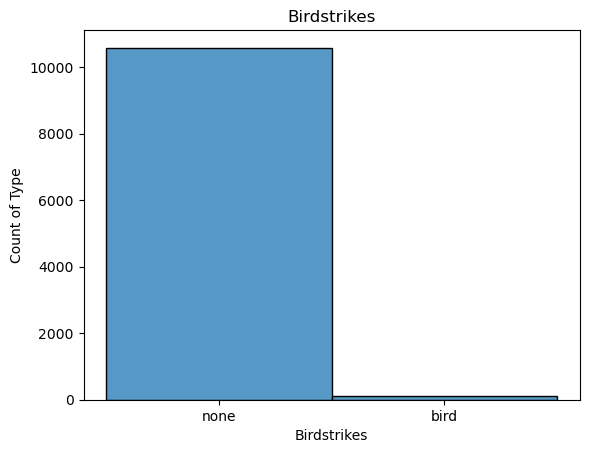

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df_cleaned['Cause'], bins=100)
plt.title("Birdstrikes")
plt.xlabel("Birdstrikes")
plt.ylabel("Count of Type")

In [62]:
df_loc_phase= df_cleaned[
    (df_cleaned["crash_site"].isin(["airport (less than 10 km from airport)"])) &
    (df_cleaned["flight_phase"].isin(["landing (descent or approach)","takeoff (climb)"]))
]
print(df_loc_phase)

            date        time                      aircraft  \
9082  1950-01-18     unknown                  douglas dc-3   
9086  1950-01-22     unknown      de havilland dh.104 dove   
9099  1950-02-05     unknown        douglas c-54 skymaster   
9104  1950-02-09     unknown       canadair c-4 north star   
9124  1950-03-07  20h 59m 0s                    martin 202   
...          ...         ...                           ...   
28507 2022-02-15     unknown       britten-norman islander   
28517 2022-04-02  11h 19m 0s                    learjet 75   
28526 2022-05-06  14h 18m 0s  cessna 421c golden eagle iii   
28530 2022-05-12    8h 4m 0s                   airbus a319   
28533 2022-05-24  15h 40m 0s      de havilland dhc-3 otter   

                                 operator                   flight_phase  \
9082         trans asiatic airlines - taa                takeoff (climb)   
9086        central african airways - caa  landing (descent or approach)   
9099                el al i

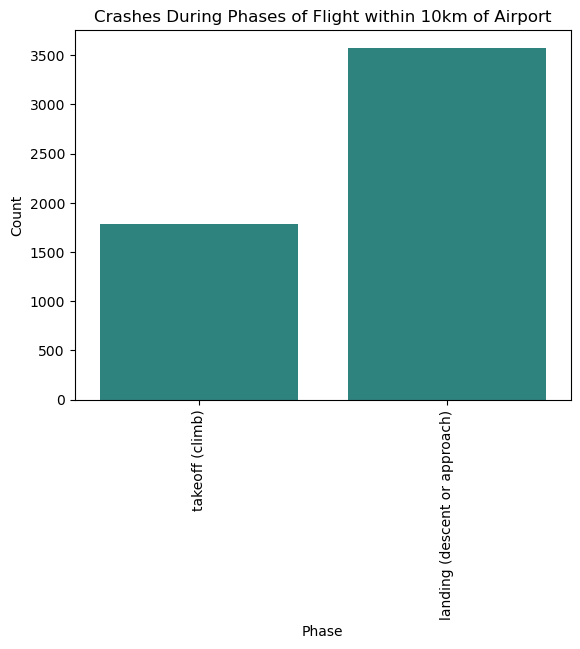

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="flight_phase", hue="crash_site", data=df_loc_phase, palette="viridis")
plt.title("Crashes During Phases of Flight within 10km of Airport")
plt.xlabel("Phase")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend().remove()  # Correct way to remove the legend
plt.show()

In [66]:
df = df_loc_phase["flight_phase"].value_counts()
print(df)

flight_phase
landing (descent or approach)    3576
takeoff (climb)                  1784
Name: count, dtype: int64


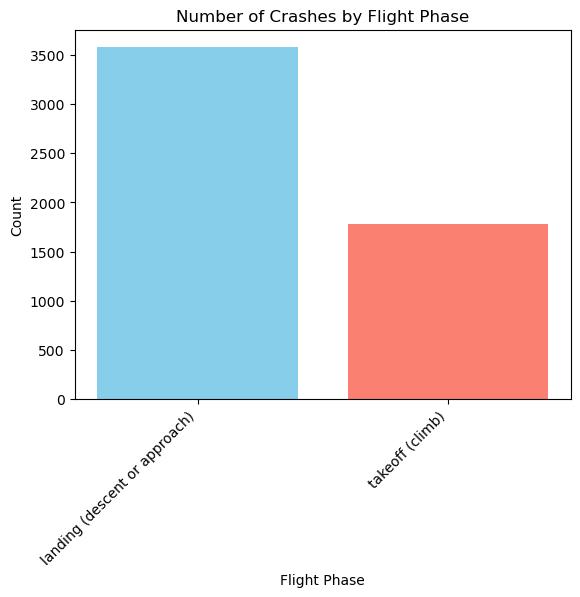

In [68]:
df = df_loc_phase["flight_phase"].value_counts()
plt.bar(df.index, df.values, color=["skyblue", "salmon"])
plt.title("Number of Crashes by Flight Phase")
plt.xlabel("Flight Phase")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')  # Adjust for better readability
plt.show()

# Crashes by country

## Wrangling

In [72]:
df_cleaned.sort_values(by="country", ascending=False)
df_cleaned

,date,time,aircraft,operator,flight_phase,flight_type,crash_site,schedule,crash_location,country,region,circumstances,crash_cause,total_on_board,total_fatalities,survivors,Cause
9071,1950-01-03,unknown,avro 652 anson,united air services - tanzania,landing (descent or approach),passenger flights,"plain, valley",unknown,kazimzumbwi pwani region,tanzania,africa,"while approaching dar es-salaam, the twin engi...",unknown,2.0,2.0,no,none
9075,1950-01-07,unknown,boeing 247,lineas aéreas guerrero oaxaca - lagosa,takeoff (climb),passenger flights,"plain, valley",unknown,mexico city federal district of mexico city,mexico,central america,"few minutes after takeoff from mexico city, th...",unknown,0.0,0.0,unknown,none
9081,1950-01-14,unknown,de havilland dh.89 dragon rapide,new zealand national airways,parking,passenger flights,airport (less than 10 km from airport),rotorua – hamilton,rotorua bay of plenty regional council,new zealand,oceania,the aircraft was parked at rotorua airport and...,technical failure,5.0,0.0,yes,none
9082,1950-01-18,unknown,douglas dc-3,trans asiatic airlines - taa,takeoff (climb),passenger flights,airport (less than 10 km from airport),unknown,yangon yangon region,myanmar,asia,an undercarriage failed during takeoff roll. t...,technical failure,0.0,0.0,yes,none
9086,1950-01-22,unknown,de havilland dh.104 dove,central african airways - caa,landing (descent or approach),passenger flights,airport (less than 10 km from airport),unknown,livingstone southern,zambia,africa,crashed on final approach to livingstone airpo...,unknown,0.0,0.0,unknown,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28529,2022-05-11,unknown,de havilland dhc-6 twin otter,caverton helicopters,flight,passenger flights,"plain, valley",yaoundé – dompta – belabo,nanga eboko centre,cameroon,africa,the twin engine airplane departed yaoundé at 1...,unknown,11.0,11.0,no,none
28530,2022-05-12,8h 4m 0s,airbus a319,tibet airlines,takeoff (climb),passenger flights,airport (less than 10 km from airport),chongqing – nyingchi,chongqing-jiangbei sichuan,china,asia,the airplane was departing chongqing-jiangbei ...,unknown,122.0,0.0,yes,none
28532,2022-05-23,18h 29m 0s,piper pa-61 aerostar (ted smith 601),raul ignacion posada,flight,passenger flights,"plain, valley",celaya - durango,durango durango,mexico,central america,while approaching durango airport on a flight ...,unknown,2.0,2.0,no,none
28533,2022-05-24,15h 40m 0s,de havilland dhc-3 otter,yakutat coastal airlines,landing (descent or approach),passenger flights,airport (less than 10 km from airport),yakutat – dry bay,dry bay alaska,united states of america,north america,the single engine airplane departed yakutat on...,unknown,4.0,0.0,yes,none


## Charts

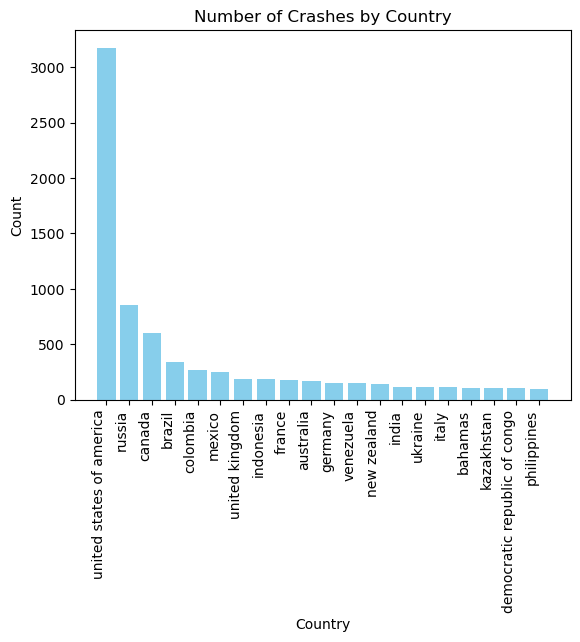

In [75]:
df_cleaned['country'].value_counts().head(20)
import matplotlib.pyplot as plt
top_20_countries = df_cleaned['country'].value_counts().head(20)
plt.bar(top_20_countries.index, top_20_countries.values, color="skyblue")
plt.title("Number of Crashes by Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=90, ha='right')
plt.show()

# Aircraft Sizes

## Import

In [248]:
df_aircrafts = pd.read_excel('/Users/haydnjones/Documents/GitHub/flight-crashes/aircraft_data.xlsx')
df_aircrafts = pd.DataFrame(df_aircrafts)

df_aircrafts = df_aircrafts.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df_aircrafts.columns = pd.Series(df_aircrafts.columns).apply(lambda col: col.lower())
df_aircrafts.dropna(how='all', inplace= True)

/opt/anaconda3/lib/python3.12/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/opt/anaconda3/lib/python3.12/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():


## Cleaning

In [251]:
df_aircrafts = df_aircrafts.drop_duplicates(subset='model_faa')

## Wrangling

In [254]:
df_cleaned_aircrafts = df_cleaned

In [256]:
df_aircrafts = df_aircrafts[['model_faa', 'length_ft', 'class']]

In [258]:
standard_aircraft_names = df_aircrafts['model_faa'].tolist()

In [260]:
def get_best_match(aircraft_name, choices, threshold=90):
    # Use extract to get top 3 matches
    matches = process.extract(aircraft_name, choices, limit=3)
    
    best_match = next((match for match in matches if match[1] >= threshold), None)
    
    return best_match[0] if best_match else None

df_cleaned_aircrafts['model_faa'] = df_cleaned_aircrafts['aircraft'].apply(lambda x: get_best_match(x, standard_aircraft_names))

In [268]:
df_cleaned_aircrafts = df_cleaned_aircrafts [['date', 'model_faa', 'flight_phase', 'crash_site', 'country', 'total_on_board', 'total_fatalities']]

In [270]:
df_cleaned_aircrafts = df_cleaned_aircrafts.dropna(subset=['model_faa'])

In [272]:
df_cleaned_aircrafts

,date,model_faa,flight_phase,crash_site,country,total_on_board,total_fatalities
9082,1950-01-18,douglas dc 3,takeoff (climb),airport (less than 10 km from airport),myanmar,0.0,0.0
9210,1950-06-09,douglas dc 3,flight,mountains,colombia,15.0,15.0
9214,1950-06-13,douglas dc 3,landing (descent or approach),"lake, sea, ocean, river",bahrain,52.0,46.0
9216,1950-06-15,douglas dc 3,landing (descent or approach),"lake, sea, ocean, river",bahrain,53.0,40.0
9226,1950-06-23,douglas dc 3,flight,"lake, sea, ocean, river",united states of america,58.0,3.0
...,...,...,...,...,...,...,...
28517,2022-04-02,learjet 75,landing (descent or approach),airport (less than 10 km from airport),united states of america,4.0,0.0
28519,2022-04-06,cessna 340,landing (descent or approach),"plain, valley",mexico,1.0,0.0
28523,2022-04-20,cessna 207 stationair 7,takeoff (climb),city,haiti,5.0,6.0
28524,2022-04-21,cessna 340,takeoff (climb),city,united states of america,2.0,2.0


In [274]:
df_aircrafts

,model_faa,length_ft,class
0,fairchild a10,53.3,fixed-wing
1,antonov an-124 ruslan,226.2,fixed-wing
2,airbus a319 neo,111.0,fixed-wing
3,airbus a320 neo,123.3,fixed-wing
4,airbus a321 neo,146.0,fixed-wing
...,...,...,...
383,socata tbm-900,35.2,fixed-wing
384,raytheon texan 2,33.2,fixed-wing
385,socata tb-10 tobago,25.4,fixed-wing
386,bell v-22 osprey,63.0,tiltrotor


In [276]:
df_aircrafts_crashed = pd.merge(df_cleaned_aircrafts, df_aircrafts, on='model_faa', how='left')

In [278]:
df_aircrafts_crashed

,date,model_faa,flight_phase,crash_site,country,total_on_board,total_fatalities,length_ft,class
0,1950-01-18,douglas dc 3,takeoff (climb),airport (less than 10 km from airport),myanmar,0.0,0.0,64.7,fixed-wing
1,1950-06-09,douglas dc 3,flight,mountains,colombia,15.0,15.0,64.7,fixed-wing
2,1950-06-13,douglas dc 3,landing (descent or approach),"lake, sea, ocean, river",bahrain,52.0,46.0,64.7,fixed-wing
3,1950-06-15,douglas dc 3,landing (descent or approach),"lake, sea, ocean, river",bahrain,53.0,40.0,64.7,fixed-wing
4,1950-06-23,douglas dc 3,flight,"lake, sea, ocean, river",united states of america,58.0,3.0,64.7,fixed-wing
...,...,...,...,...,...,...,...,...,...
3217,2022-04-02,learjet 75,landing (descent or approach),airport (less than 10 km from airport),united states of america,4.0,0.0,58.0,fixed-wing
3218,2022-04-06,cessna 340,landing (descent or approach),"plain, valley",mexico,1.0,0.0,43.3,fixed-wing
3219,2022-04-20,cessna 207 stationair 7,takeoff (climb),city,haiti,5.0,6.0,31.5,fixed-wing
3220,2022-04-21,cessna 340,takeoff (climb),city,united states of america,2.0,2.0,43.3,fixed-wing


In [280]:
df_aircrafts_crashed['size_cat'] = df_aircrafts_crashed['length_ft'].apply(
    lambda x: 'small_aircraft' if x <= 100 else ('medium_aircraft' if 100 < x <= 180 else 'large_aircraft')
)

In [282]:
df_aircrafts_crashed['size_cat'].value_counts()

size_cat
small_aircraft     2161
medium_aircraft     972
large_aircraft       89
Name: count, dtype: int64

## Charts

In [313]:
df_aircrafts_crashed

,date,model_faa,flight_phase,crash_site,country,total_on_board,total_fatalities,length_ft,class,size_cat
0,1950-01-18,douglas dc 3,takeoff (climb),airport (less than 10 km from airport),myanmar,0.0,0.0,64.7,fixed-wing,small_aircraft
1,1950-06-09,douglas dc 3,flight,mountains,colombia,15.0,15.0,64.7,fixed-wing,small_aircraft
2,1950-06-13,douglas dc 3,landing (descent or approach),"lake, sea, ocean, river",bahrain,52.0,46.0,64.7,fixed-wing,small_aircraft
3,1950-06-15,douglas dc 3,landing (descent or approach),"lake, sea, ocean, river",bahrain,53.0,40.0,64.7,fixed-wing,small_aircraft
4,1950-06-23,douglas dc 3,flight,"lake, sea, ocean, river",united states of america,58.0,3.0,64.7,fixed-wing,small_aircraft
...,...,...,...,...,...,...,...,...,...,...
3217,2022-04-02,learjet 75,landing (descent or approach),airport (less than 10 km from airport),united states of america,4.0,0.0,58.0,fixed-wing,small_aircraft
3218,2022-04-06,cessna 340,landing (descent or approach),"plain, valley",mexico,1.0,0.0,43.3,fixed-wing,small_aircraft
3219,2022-04-20,cessna 207 stationair 7,takeoff (climb),city,haiti,5.0,6.0,31.5,fixed-wing,small_aircraft
3220,2022-04-21,cessna 340,takeoff (climb),city,united states of america,2.0,2.0,43.3,fixed-wing,small_aircraft


<Axes: title={'center': 'Crash Frequency by Aircraft Size'}, xlabel='Aircraft Size Category', ylabel='Number of Crashes'>

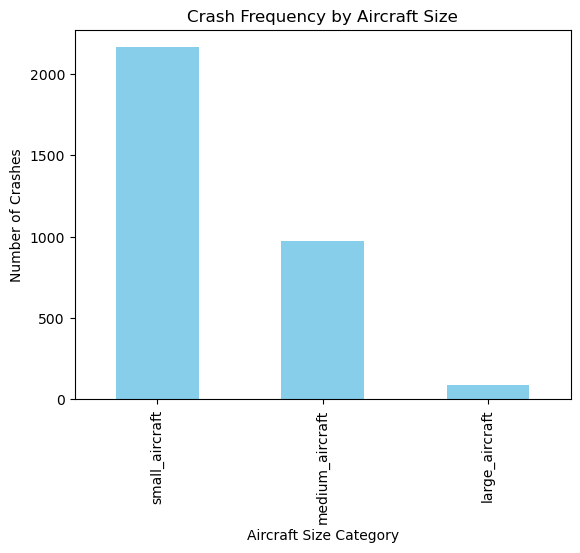

In [315]:
df_aircrafts_crashed['size_cat'].value_counts().plot(
    kind='bar',
    title='Crash Frequency by Aircraft Size',
    xlabel='Aircraft Size Category',
    ylabel='Number of Crashes',
    color='skyblue'
)

<Axes: title={'center': 'Crashes Over Time'}, xlabel='Year', ylabel='Number of Crashes'>

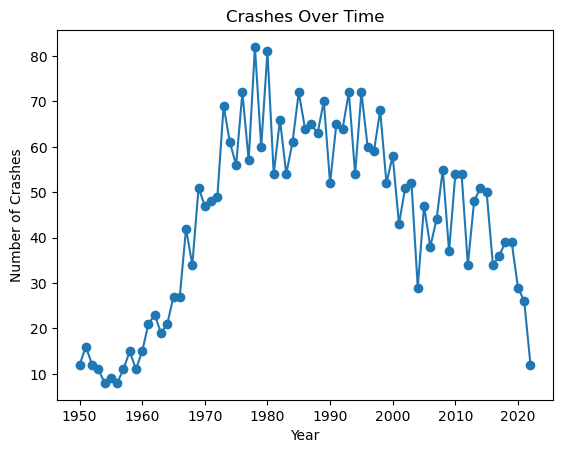

In [317]:
df_aircrafts_crashed['date'] = pd.to_datetime(df_aircrafts_crashed['date'])
crashes_per_year = df_aircrafts_crashed['date'].dt.year.value_counts().sort_index()
crashes_per_year.plot(
    kind='line',
    title='Crashes Over Time',
    xlabel='Year',
    ylabel='Number of Crashes',
    marker='o'
)

<Axes: title={'center': 'Correlation Between Total Onboard and Fatalities'}, xlabel='total_on_board', ylabel='total_fatalities'>

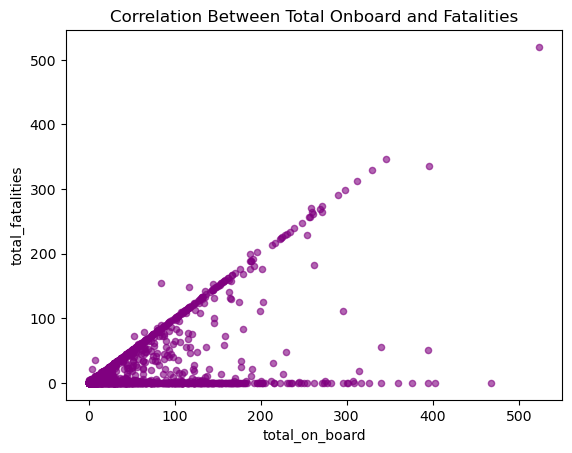

In [327]:
df_aircrafts_crashed.plot.scatter(
    x='total_on_board',
    y='total_fatalities',
    title='Correlation Between Total Onboard and Fatalities',
    alpha=0.6,
    color='purple'
)

<Axes: title={'center': 'Crash Distribution by Flight Phase'}, ylabel='count'>

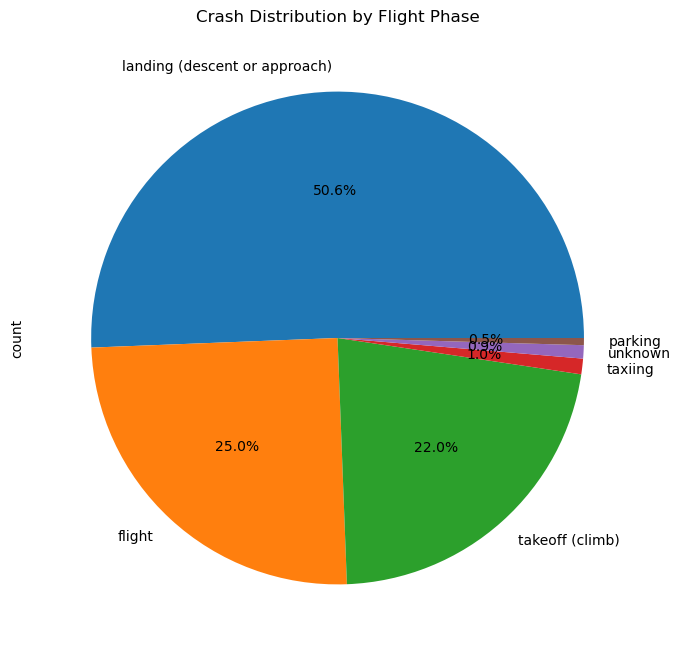

In [329]:
flight_phase_distribution = df_aircrafts_crashed['flight_phase'].value_counts()
flight_phase_distribution.plot(
    kind='pie',
    title='Crash Distribution by Flight Phase',
    autopct='%1.1f%%',
    figsize=(8, 8)
)